In [1]:
import numpy as np
import pandas as pd
import os
import subprocess
import math
import matplotlib.pyplot as plt
import glob

In [2]:
def ProcessSAMdat_single_redshift(path_to_SAM, Nsubvols, sought_z, fieldswanted, gal_or_halo):
    g_colnames = ['halo_index', 'birthhaloid', 'roothaloid', 'redshift', 'sat_type',
                  'mhalo', 'm_strip', 'rhalo', 'mstar', 'mbulge', 'mstar_merge', 'v_disk',
                  'sigma_bulge', 'r_disk', 'r_bulge', 'mcold', 'mHI', 'mH2', 'mHII', 'Metal_star',
                  "Metal_cold", 'sfr', 'sfrave20myr', 'sfrave100myr', 'sfrave1gyr',
                  'mass_outflow_rate', 'metal_outflow_rate', 'mBH', 'maccdot', 'maccdot_radio',
                  'tmerge', 'tmajmerge', 'mu_merge', 't_sat', 'r_fric', 'x_position',
                  'y_position', 'z_position', 'vx', 'vy', 'vz']
    h_colnames = ['halo_index', 'halo_id', 'roothaloid', 'orig_halo_ID', 'redshift', 'm_vir', 'c_nfw',
                  'spin', 'm_hot', 'mstar_diffuse', 'mass_ejected', 'mcooldot',
                  'maccdot_pristine', 'maccdot_reaccrete', 'maccdot_metal_reaccrete',
                  'maccdot_metal', 'mdot_eject', 'mdot_metal_eject', 'maccdot_radio',
                  'Metal_hot', 'Metal_ejected', 'snap_num']
    g_header_rows = []
    for i in range(0, len(g_colnames)):
        g_header_rows.append(i)
    h_header_rows = []
    for i in range(0, len(h_colnames)):
        h_header_rows.append(i)

    input_path=path_to_SAM

    if type(fieldswanted) == list:
        print(type(fieldswanted))
    else:
        return "Fieldswanted should be a list with the fields you want as strings!"

    All_halos=np.zeros((1,len(fieldswanted)))
    if gal_or_halo=="gal":
        
        checknums=0
        
        if Nsubvols == 1:
            
            for x_i in np.arange(0, 1,1):

                for x_j in np.arange(0,1,1):
                
                    for x_k in np.arange(0,1,1):
                    
                        galprop = pd.read_csv('{}/{}_{}_{}/galprop_0-99.dat'.format(input_path, x_i, x_j, x_k),
                                              delimiter=' ', skiprows=g_header_rows, names=g_colnames)
                        # print('galprop read for ',x_i, x_j, x_k,' shape:', galprop.shape)
                        current_galprops=galprop[fieldswanted[:]].to_numpy()
     #usually want this but too much printing for 1000 subvol                   #print('For subvolume ',x_i,x_j,x_k, current_galprops.shape)
                        unique_redshifts=set(current_galprops[:,0])
                        unique_redshifts = np.array(sorted(unique_redshifts))
                        # print(unique_redshifts)
                        idx = (np.abs(unique_redshifts - sought_z)).argmin()
                        current_galprops_z=current_galprops[np.where(current_galprops[:,0][:]==unique_redshifts[idx])[0],:]
                        # print(current_galprops_z.shape)
                        checknums=checknums+len(current_galprops_z)
                        All_halos=np.concatenate((All_halos,current_galprops_z))

        if Nsubvols == 8:
            
            for x_i in np.arange(0, 2,1):

                for x_j in np.arange(0,2,1):
                
                    for x_k in np.arange(0,2,1):
                        
                        galprop = pd.read_csv('{}/{}_{}_{}/galprop_0-99.dat'.format(input_path, x_i, x_j, x_k),
                                              delimiter=' ', skiprows=g_header_rows, names=g_colnames)
                        # print('galprop read for ',x_i, x_j, x_k,' shape:', galprop.shape)
                        current_galprops=galprop[fieldswanted[:]].to_numpy()
  #usually want this but too much printing for 1000 subvol                       #print('For subvolume ',x_i,x_j,x_k, current_galprops.shape)
                        unique_redshifts=set(current_galprops[:,0])
                        unique_redshifts = np.array(sorted(unique_redshifts))
                        # print(unique_redshifts)
                        idx = (np.abs(unique_redshifts - sought_z)).argmin()
                        current_galprops_z=current_galprops[np.where(current_galprops[:,0][:]==unique_redshifts[idx])[0],:]
                        # print(current_galprops_z.shape)
                        checknums=checknums+len(current_galprops_z)
                        All_halos=np.concatenate((All_halos,current_galprops_z))
        print(All_halos.shape, checknums)
        return All_halos
    
    elif gal_or_halo=="halo":
        checknums2=0
        for x_i in np.arange(0,Nsubvols,1):   #is it here? the problem is this Nsubvols thing? like it's trying to go all the way to 8?
            for x_j in np.arange(0,Nsubvols,1):
                for x_k in np.arange(0,Nsubvols,1):
                    haloprop = pd.read_csv('{}/{}_{}_{}/haloprop_0-99.dat'.format(input_path, x_i, x_j, x_k),
                                           delimiter=' ', skiprows=h_header_rows, names=h_colnames)
                    current_haloprops=haloprop[fieldswanted[:]].to_numpy()
                    print('For subvolume ',x_i,x_j,x_k, current_haloprops.shape)
                    unique_redshifts=set(current_haloprops[:,0])
                    unique_redshifts = np.array(sorted(unique_redshifts))
                    idx = (np.abs(unique_redshifts - sought_z)).argmin()
                    current_haloprops_z=current_haloprops[np.where(current_haloprops[:,0][:]==unique_redshifts[idx])[0],:]
                    # print(current_haloprops_z.shape)
                    checknums2=checknums2+len(current_haloprops_z)
                    All_halos=np.concatenate((All_halos,current_haloprops_z))
        print(All_halos.shape, checknums2)
        return All_halos[1:,:]
    else:
        print("gal_or_halo need to be a string, either 'gal' or 'halo', to get galprop or haloprop respectively. Make sure the fields you want are actually reflected!")
        print("Column names of galprop file: ", g_colnames)
        print("Column names of haloprop file: ", h_colnames)
        return All_halos

In [4]:
def run_for_all_sims(start, stop):
    
    fields_wanted = ['redshift', 'sfr']
    
    redshifts_list = [0,1,2,3,4,5,6,7,8,9]
    
    
    
    rows = {
    
    "redshift": redshifts_list
            
    }
    
    
    
    global sfr_df
    
    sfr_df = pd.DataFrame(rows)
    
    def sum_sfr(sim):
        
        sfr = list(sim[:, 1])
        
        sfr_sums =sum(sfr)
    
        return(sfr_sums)
    

    
    for i in range(start,stop):
        
        
    
        mypath = '/mnt/ceph/users/camels/PUBLIC_RELEASE/SCSAM/LH_' + str(i) + '/sc-sam'
        
        
        print(mypath)
        
        #count subvolumes 
        subvol_dirs = glob.glob("%s/*_*_*" % mypath)
        
        N_subvol = (len(subvol_dirs))
        print(N_subvol)
        
        sfrs_sums_list = []
        
        sims_list = []

        for l in redshifts_list:
                
            sims_list.append(ProcessSAMdat_single_redshift(mypath, N_subvol, l, fields_wanted, 'gal'))
                
        
        for sim in sims_list:
            
            sfrs_sums_list.append(sum_sfr(sim))   


        
        sfrs_sums_list = [j/(100**3) for j in sfrs_sums_list]
        
        
    
     
        
        sfr_df.insert(1, str("sfr sum" + " " + str(i)), sfrs_sums_list)
        
    
        

            
       
        
        sfr_df.to_csv("sfrh_csv")
            
        
        print(str("sim num " + str(i)))
        
        
        
        
    sfr_df["mean"] = sfr_df.iloc[:,1:].mean(axis=1)

    
    sfr_df["std dev"] = np.std(sfr_df.iloc[:,1:-1], axis = 1) 
    
    sfr_df.to_csv("sfrh_csv")
    
    

In [5]:
run_for_all_sims(1, 1001)

/mnt/ceph/users/camels/PUBLIC_RELEASE/SCSAM/LH_1/sc-sam
1
<class 'list'>
(135120, 2) 135119
<class 'list'>
(138783, 2) 138782
<class 'list'>
(125523, 2) 125522
<class 'list'>
(96572, 2) 96571
<class 'list'>
(67589, 2) 67588
<class 'list'>
(39986, 2) 39985
<class 'list'>
(18674, 2) 18673
<class 'list'>
(10452, 2) 10451
<class 'list'>
(3684, 2) 3683
<class 'list'>
(1471, 2) 1470
sim num 996
/mnt/ceph/users/camels/PUBLIC_RELEASE/SCSAM/LH_2/sc-sam
8
<class 'list'>
(153179, 2) 153178
<class 'list'>
(163516, 2) 163515
<class 'list'>
(156734, 2) 156733
<class 'list'>
(130998, 2) 130997
<class 'list'>
(101087, 2) 101086
<class 'list'>
(68768, 2) 68767
<class 'list'>
(39286, 2) 39285
<class 'list'>
(25584, 2) 25583
<class 'list'>
(11564, 2) 11563
<class 'list'>
(5733, 2) 5732
sim num 996
/mnt/ceph/users/camels/PUBLIC_RELEASE/SCSAM/LH_3/sc-sam
1
<class 'list'>
(130034, 2) 130033
<class 'list'>
(116655, 2) 116654
<class 'list'>
(79803, 2) 79802
<class 'list'>
(40350, 2) 40349
<class 'list'>
(1767

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
sfr_df

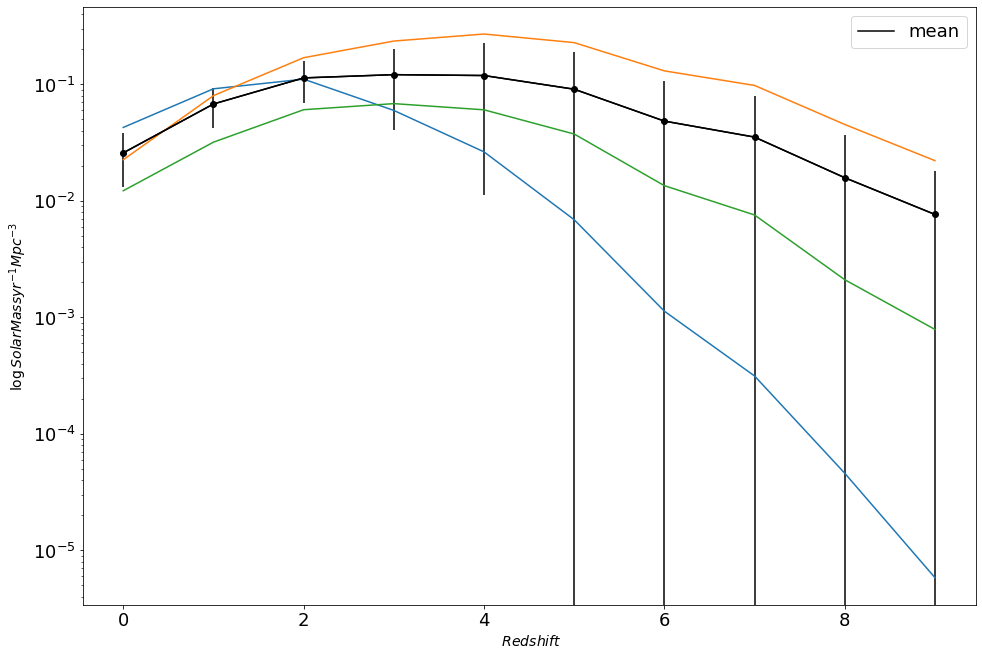

In [10]:
plt.rcParams["figure.figsize"] = (16,11)

plt.plot(sfr_df["redshift"], sfr_df.iloc[:,1:-2])

plt.plot(sfr_df["redshift"], sfr_df["mean"], color = 'black', label = "mean")

plt.errorbar(sfr_df["redshift"], sfr_df["mean"], yerr= sfr_df["std dev"], fmt='-o', color = "black")

plt.legend(fontsize = 18)

plt.yscale('log')

plt.ylabel(r'$\log Solar Mass yr^{-1} Mpc^{-3}$', fontsize = 14)

plt.xlabel(r'$\ Redshift $', fontsize = 14)

plt.xticks(fontsize = 18)

plt.yticks(fontsize = 18)




plt.show()